In [6]:
import polars as pl
import polars.selectors as cs
import soccerdata as sd
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import numpy as np
import pyarrow
import seaborn as sb
import bs4
import plotly.express as px
import math
import json
import os
import requests
from fontTools.misc.cython import returns
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch

In [29]:
# fm = sd.FotMob(leagues="ENG-Premier League", seasons="2025/2026")
ws = sd.WhoScored(leagues="ENG-Premier League", seasons=2025)
#match_stats = fm.read_team_match_stats(opponent_stats=True, team="Manchester United")


[02/15/26 16:35:54] INFO     Saving cached data to C:\Users\User\soccerdata\data\WhoScored           ]8;id=522195;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=164784;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

In [ ]:
game_id = 1903307
game = ws.read_events(match_id=game_id)

In [ ]:
loader = ws.read_events(game_id, output_fmt="loader")
df_players = loader.players(game_id=game_id)
game

In [10]:
from pyfonts import load_google_font
font = load_google_font("DotGothic16")

In [11]:
game["type"]

league              season  game                                
ENG-Premier League  2526    2026-01-17 Nottingham Forest-Arsenal    OffsideGiven
                            2026-01-17 Nottingham Forest-Arsenal           Start
                            2026-01-17 Nottingham Forest-Arsenal           Start
                            2026-01-17 Nottingham Forest-Arsenal            Pass
                            2026-01-17 Nottingham Forest-Arsenal            Pass
                                                                        ...     
                            2026-01-17 Nottingham Forest-Arsenal             End
                            2026-01-17 Nottingham Forest-Arsenal             End
                            2026-01-17 Nottingham Forest-Arsenal             End
                            2026-01-17 Nottingham Forest-Arsenal    FormationSet
                            2026-01-17 Nottingham Forest-Arsenal    FormationSet
Name: type, Length: 1415, dtype: object

In [32]:
game[game["type"] == 'TakeOn']

game_id  \
league             season game                                            
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   

                                                                    period  \
league             season game                                               
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-

#パスネットワーク構築用function

In [12]:
def find_opp(df):
    teams = df['team'].sort_values().to_list()
    opposition = ''
    if teams[0] == 'Man Utd':
        return teams[-1]
    else:
        return teams[0]


def splitter(df):
    return_df = df[(df['type'] == 'Pass') & (df['outcome_type'] == 'Successful')]

    return_df['x'] *= 1.2
    return_df['end_x'] *= 1.2
    return_df['y'] *= 0.8
    return_df['end_y'] *= 0.8
    return_df.insert(1, "pass_angle",
    np.degrees(np.arctan2(
        return_df['end_y'] - return_df['y'],
        return_df['end_x'] - return_df['x']
        ))
    )
    return_df.insert(2, "pass_angle_abs",
    np.abs(return_df['pass_angle'])
    )
    return_df.insert(3, 'receiver',
    return_df['player_id'].shift(-1)
    )
    return return_df


def pass_comb(df):
    df['pos_min'] = df[['player_id', 'receiver']].min(axis=1)

    df['pos_max'] = df[['player_id', 'receiver']].max(axis=1)

    passing_comb = df.groupby(['pos_min', 'pos_max']).size().reset_index(name='pass_count')

    return passing_comb


def enhance_position(passdf, game_id, list_players):
    avg_locs = passdf.groupby('player_id').agg({
    'x': 'median',
    'y': 'median',
    'player_id': 'count'
    })
    avg_locs.columns = ['x_avg', 'y_avg', 'counts']
    avg_locs = avg_locs.merge(df_players, on='player_id', how='outer')
    return avg_locs


def team_metric(df, location, team_id):
    passes = df
    valid_pass = passes[
    (passes['pass_angle_abs'] >= 0) &
    (passes['pass_angle_abs'] <= 90)
    ]
    median_angle = valid_pass['pass_angle_abs'].median()
    verticality = round((1 - median_angle / 90) * 100, 2)
    center_backs = location[location['starting_position'] == 'DC']
    defense_line = center_backs['x_avg'].median() if len(center_backs) > 0 else 30

    attackers = location[location['starting_position'].isin(['FW', 'AMC'])]
    forward_line = attackers['x_avg'].mean() if len(attackers) > 0 else 90
    team_median = location['x_avg'].median()

    return {
    'verticality': verticality,
    'defense_line': defense_line,
    'forward_line': forward_line,
    'team_median': team_median
    }


def plotter(ax, passes_df, avg_locs, pass_combinations, team_metrics,
team_name, color='blue', bg_color='#0C0D0E'):
    pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color=bg_color, linewidth=1)


    pitch.draw(ax=ax)
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_facecolor(bg_color)

    combinations = pass_combinations.merge(
    avg_locs[['x_avg', 'y_avg', 'player_name', 'player_id']],
    left_on='pos_min', right_on='player_id'
    ).merge(
    avg_locs[['x_avg', 'y_avg', 'player_name', 'player_id']],
    left_on='pos_max', right_on='player_id',
    suffixes=['', '_end']
    )

    max_passes = combinations['pass_count'].max()
    combinations['line_width'] = (combinations['pass_count'] / max_passes) * 15
    combinations['alpha'] = 0.3 + (combinations['pass_count'] / max_passes) * 0.6

    for _, row in combinations.iterrows():
        pitch.lines(row['x_avg'], row['y_avg'], row['x_avg_end'], row['y_avg_end'],lw=row['line_width'], color=color, alpha=row['alpha'], ax=ax, zorder=1)

    defense_line = team_metrics['defense_line']
    forward_line = team_metrics['forward_line']
    team_median = team_metrics['team_median']

    ax.axvline(x=defense_line, color='lightgray', linestyle='dotted', alpha=0.6, linewidth=2, zorder=2)
    ax.axvline(x=forward_line, color='lightgray', linestyle='dotted', alpha=0.6, linewidth=2, zorder=2)
    ax.axvline(x=team_median, color='lightgray', linestyle='--', alpha=0.8, linewidth=2, zorder=2)

    min_line = min(defense_line, forward_line)
    max_line = max(defense_line, forward_line)
    ymid = [0, 0, 80, 80]
    xmid = [min_line, max_line, max_line, min_line]
    ax.fill(xmid, ymid, color, alpha=0.1, zorder=0)

    for player_id, row in avg_locs.iterrows():
        marker = 'o' if row['is_starter'] else 's'
        pitch.scatter(row['x_avg'], row['y_avg'], s=1200, marker=marker,color='white', edgecolors=color, linewidth=3, ax=ax, zorder=3)

        ax.text(row['x_avg'], row['y_avg'], str(row['jersey_number']),
        ha='center', va='center', font=font, fontsize=14, color=color, weight='bold', zorder=4)

    ax.text(115, 75, "○ = starter\n□ = substitute",
    fontsize=11, ha='right', va='top', color='white',
    bbox=dict(boxstyle="round,pad=0.3", facecolor=bg_color, edgecolor='white', alpha=0.8))
    ax.text(10, -8, f"Verticality: {team_metrics['verticality']}%",
    font=font, fontsize=12, ha='left', color='white', weight='bold')
    ax.text(70, -8, f"Median: {team_metrics['team_median']:.1f}m",
    font=font, fontsize=12, ha='left', color='white', weight='bold')

    ax.set_title(f"{team_name} - Passing Network", font=font, fontsize=14, color='white')

In [13]:
game

game_id  \
league             season game                                            
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
...                                                                 ...   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   

                                                                    period  \
league             season game                                               
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
...                                                                    ...   
                          2026-01-17 Nottingham Forest-Arsenal  SecondHalf   
                          2026-01-17 Nottingham Forest-Arsenal    PostGame   
                          2026-01-17 Nottingham Forest-Arsenal    PostGame   
                          2026-01-17 Nottingham Forest-Arsenal    PreMatch   
                          2026-01-17 Nottingham Forest-Arsenal    PreMatch   

                                                                minute  \
league             season game                                           
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
...                                                                ...   
                          2026-01-17 Nottingham Forest-Arsenal      95   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   

                                                                second  \
league             season game                                           
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal     NaN   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal     4.0   
...                                                                ...   
                          2026-01-17 Nottingham Forest-Arsenal    25.0   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal     0.0   

                                                                expanded_minute  \
league             season game                                  

#ショットマップ作成

In [14]:
def shotmap_gen(match):
    DIR = 'utd_games'

    game_shots = match

    shots_df = game_shots[
    ['minute', 'second', 'team', 'x', 'y', 'end_x','end_y','is_shot', 'is_goal', 'blocked_x', 'blocked_y', 'goal_mouth_y',
    'goal_mouth_z']]
    shots_df = shots_df[shots_df['is_shot'] == True]
    shots_df

    teams = shots_df['team'].sort_values().to_list()
    opposition = ''
    if teams[0] == 'Man Utd':
        opposition = teams[-1]
    else:
        opposition = teams[0]

    man_utd_shots_df = shots_df[shots_df['team'] == 'Man Utd']

    opposition_shots_df = shots_df[shots_df['team'] == opposition]

    mutd_g_df = man_utd_shots_df[man_utd_shots_df['is_goal'] == True]
    mutd_ng_df = man_utd_shots_df[man_utd_shots_df['is_goal'] != True]

    opposition_g_df = opposition_shots_df[opposition_shots_df['is_goal'] == True]
    opposition_ng_df = opposition_shots_df[opposition_shots_df['is_goal'] != True]

    pitch = Pitch(pitch_type='opta',half=True, goal_type='box', goal_alpha=0.8)
    fig, ax = pitch.draw(figsize=(10, 8))
    fig.patch.set_facecolor('black')
    United_sc_g = pitch.scatter(mutd_g_df['x'], mutd_g_df['y'], marker="*", c='red', ax=ax, linewidth=3)
    United_sc_g = pitch.scatter(mutd_ng_df['x'], mutd_ng_df['y'], marker="o", c='white', ax=ax, linewidth=3)


    fig.text(s=f"Manchester United ショットマップ", x=0.05, y=0.96, font=font, fontsize=22, fontweight="bold")

#試合スタッツ作成
(fotmob用API周りのメンテ中)

In [15]:
"""fm = sd.FotMob(leagues="ENG-Premier League", seasons="2025/2026")
match_stats = fm.read_team_match_stats(opponent_stats=True, team="Manchester United")
match_stats
lists = []
for i in range(43):
if i != 0:
lists.append(str(i))
match_stats.insert(0, 'game_count', lists)
n = 2
match_stats['game_count'] = [int(i/n) for i,x in enumerate(match_stats['game_count'])]
match_week = 20
game_copy = match_stats[match_stats['game_count'] == 20]
game_copy = game_copy.droplevel('league')
game_copy = game_copy.droplevel('season')
game_copy = game_copy.droplevel('game')
lists = []
for row in game_copy:
lists.append(row)
teams = game_copy.index.values
game_copy['Team'] = teams
game_copy.set_index('game_count', inplace=True)
game_copy

import matplotlib.pyplot as plt
import numpy as np

teams = game_copy['Team'].to_list()

category_names = [teams[0], teams[1]]
results = {
'Ball possession': game_copy['Ball possession'].to_list(),
'Accurate Passes': game_copy['Accurate passes'].to_list(),
'Accurate Passes (%)': game_copy['Accurate passes (%)'].to_list(),
'Total shots': game_copy['Total shots'].to_list(),
'Shots on Target': game_copy['Shots on target'].to_list(),
'Expected goals (xG)': game_copy['Expected goals (xG)'].to_list(),
'Big chances': game_copy['Big chances'].to_list(),
'Big chances missed': game_copy['Big chances missed'].to_list()
}

results
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pyfonts import load_google_font

warnings.filterwarnings('ignore')

font = load_google_font("DotGothic16")

team_names = list(game_copy['Team'].unique())
team_colors = ['#EF0107', '#DA291C']

categories = [
'Ball possession', 'Accurate passes', 'Accurate passes (%)',
'Total shots', 'Shots on target', 'Expected goals (xG)',
'Big chances', 'Big chances missed', 'Corners', 'Fouls committed'
]

カテゴリ = [
'ポゼッション率', 'パス成功数', 'パス成功率', 'シュート数', 'シュート数(枠内)', 'xG', 'ビッグチャンス',
'ビッグチャンス(ミス)', 'コーナー', 'ファウル'
]

team_a_data = [float(game_copy.iloc[0][cat]) for cat in categories]
team_b_data = [float(game_copy.iloc[1][cat]) for cat in categories]

print()

fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
y_pos = np.arange(len(categories))

for i, (a_val, b_val) in enumerate(zip(team_a_data, team_b_data)):
total = a_val + b_val
if total == 0: total = 1

a_len = a_val / total
b_len = b_val / total

ax.barh(i, a_len, color='blue', left=-a_len, height=0.6)

ax.barh(i, b_len, color='red', left=0, height=0.6)

if a_len > 0:
ax.text(-a_len - 0.05, i, str(a_val), ha='right', va='center', font=font, fontweight='bold')
else:
ax.text(-0.5, i, str(a_val), ha='right', va='center', font=font, fontweight='bold')
if b_len > 0:
ax.text(b_len + 0.05, i, str(b_val), ha='left', va='center', font=font, fontweight='bold')
else:
ax.text(0.5, i, str(b_val), ha='right', va='center', font=font, fontweight='bold')

for i, cat in enumerate(カテゴリ):
ax.text(0, i, cat, ha='center', va='center', bbox=dict(facecolor='black', edgecolor='none', alpha=0.7), font=font,
fontweight='bold')

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1, len(categories))
ax.axis('off')

plt.title(f"{team_names[0]} (左) vs {team_names[1]} (右)", font=font, fontsize=14, pad=20)
plt.show()"""

'fm = sd.FotMob(leagues="ENG-Premier League", seasons="2025/2026")\nmatch_stats = fm.read_team_match_stats(opponent_stats=True, team="Manchester United")\nmatch_stats\nlists = []\nfor i in range(43):\nif i != 0:\nlists.append(str(i))\nmatch_stats.insert(0, \'game_count\', lists)\nn = 2\nmatch_stats[\'game_count\'] = [int(i/n) for i,x in enumerate(match_stats[\'game_count\'])]\nmatch_week = 20\ngame_copy = match_stats[match_stats[\'game_count\'] == 20]\ngame_copy = game_copy.droplevel(\'league\')\ngame_copy = game_copy.droplevel(\'season\')\ngame_copy = game_copy.droplevel(\'game\')\nlists = []\nfor row in game_copy:\nlists.append(row)\nteams = game_copy.index.values\ngame_copy[\'Team\'] = teams\ngame_copy.set_index(\'game_count\', inplace=True)\ngame_copy\n\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nteams = game_copy[\'Team\'].to_list()\n\ncategory_names = [teams[0], teams[1]]\nresults = {\n\'Ball possession\': game_copy[\'Ball possession\'].to_list(),\n\'Accurate Passes\'

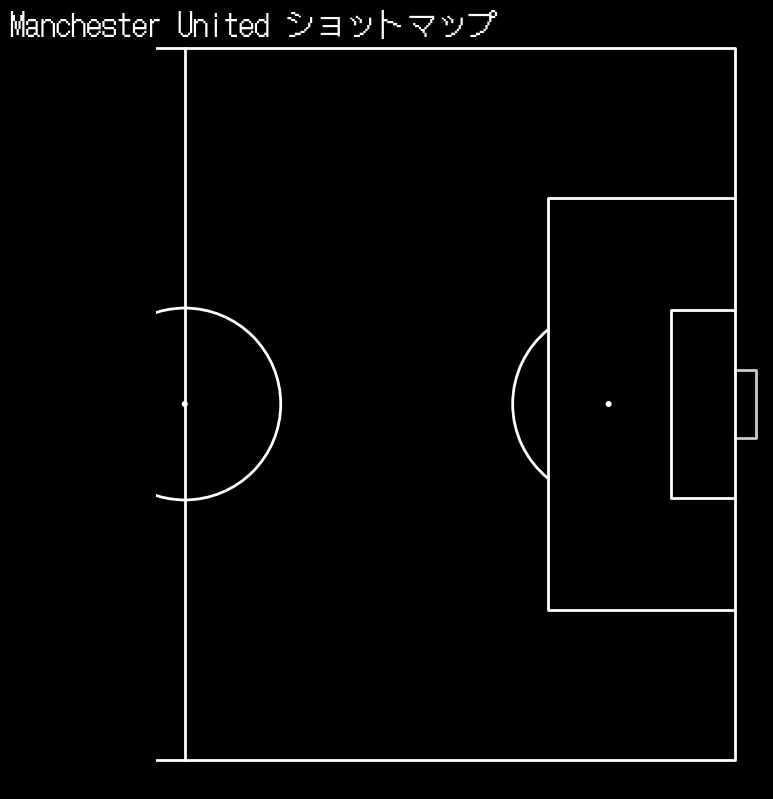

In [16]:
shotmap_gen(game)

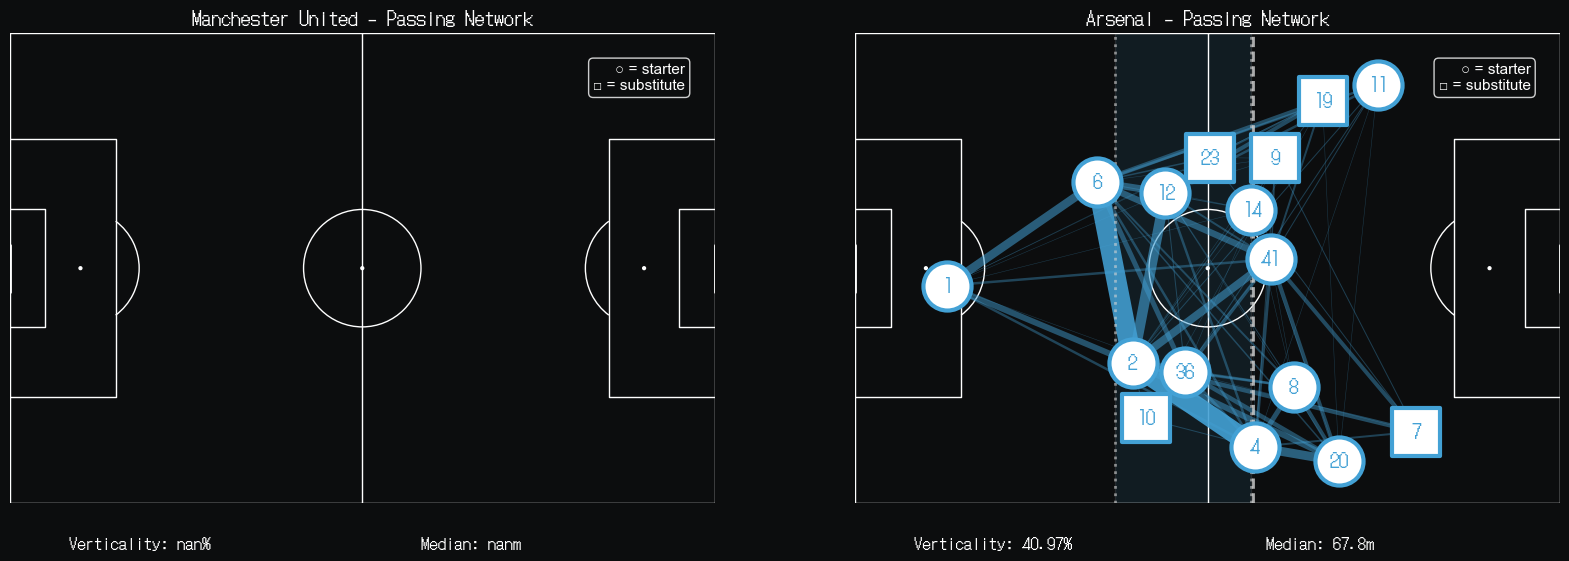

In [17]:
import warnings

warnings.filterwarnings('ignore')

pass_df = game[['team', 'player', 'player_id', 'minute', 'type', 'outcome_type', 'second', 'x', 'y', 'end_x', 'end_y']]

opposition = find_opp(pass_df)
mutd_df = pass_df[pass_df['team'] == 'Man Utd']
opposition_df = pass_df[pass_df['team'] == opposition]

mutd_pass_df = splitter(mutd_df)
opposition_pass_df = splitter(opposition_df)

mutd_pass_comb = pass_comb(mutd_pass_df)
opposition_pass_comb = pass_comb(opposition_pass_df)

mutd_avg_location = enhance_position(mutd_pass_df, game_id, mutd_pass_comb)
opposition_avg_location = enhance_position(opposition_pass_df, game_id, opposition_pass_comb)

mutd_team_metric = team_metric(mutd_pass_df, mutd_avg_location, game_id)
opposition_team_metric = team_metric(opposition_pass_df, opposition_avg_location, game_id)

background_color = '#0C0D0E'
home_color = '#FF4C4C'
away_color = '#43A1D5'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.patch.set_facecolor(background_color)

plotter(ax1, mutd_df, mutd_avg_location, mutd_pass_comb, mutd_team_metric,
'Manchester United', color=home_color, bg_color=background_color)

plotter(ax2, opposition_df, opposition_avg_location, opposition_pass_comb, opposition_team_metric,
opposition, color=away_color, bg_color=background_color)

In [18]:
Pass  = game[game['player'] == 'Elliot Anderson']

In [19]:
Pass

game_id  \
league             season game                                            
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
...                                                                 ...   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   

                                                                    period  \
league             season game                                               
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
                          2026-01-17 Nottingham Forest-Arsenal   FirstHalf   
...                                                                    ...   
                          2026-01-17 Nottingham Forest-Arsenal  SecondHalf   
                          2026-01-17 Nottingham Forest-Arsenal  SecondHalf   
                          2026-01-17 Nottingham Forest-Arsenal  SecondHalf   
                          2026-01-17 Nottingham Forest-Arsenal  SecondHalf   
                          2026-01-17 Nottingham Forest-Arsenal  SecondHalf   

                                                                minute  \
league             season game                                           
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       0   
                          2026-01-17 Nottingham Forest-Arsenal       1   
                          2026-01-17 Nottingham Forest-Arsenal       2   
...                                                                ...   
                          2026-01-17 Nottingham Forest-Arsenal      83   
                          2026-01-17 Nottingham Forest-Arsenal      83   
                          2026-01-17 Nottingham Forest-Arsenal      84   
                          2026-01-17 Nottingham Forest-Arsenal      94   
                          2026-01-17 Nottingham Forest-Arsenal      94   

                                                                second  \
league             season game                                           
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal     0.0   
                          2026-01-17 Nottingham Forest-Arsenal    14.0   
                          2026-01-17 Nottingham Forest-Arsenal    15.0   
                          2026-01-17 Nottingham Forest-Arsenal    12.0   
                          2026-01-17 Nottingham Forest-Arsenal    21.0   
...                                                                ...   
                          2026-01-17 Nottingham Forest-Arsenal    38.0   
                          2026-01-17 Nottingham Forest-Arsenal    39.0   
                          2026-01-17 Nottingham Forest-Arsenal    36.0   
                          2026-01-17 Nottingham Forest-Arsenal    28.0   
                          2026-01-17 Nottingham Forest-Arsenal    34.0   

                                                                expanded_minute  \
league             season game                                  

In [30]:
def pass_plot (ax, df1,df2, bg_color):
    player = df1['player'].head(1)
    pitch.draw(ax = ax)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_facecolor(bg_color)

    for _, row in df1.iterrows():
        color = 'red'
        pitch.lines(row['x'], row['y'],row['end_x'], row['end_y'], color = color, linewidth=6, transparent=True, comet=True,ax=ax, zorder=1)

    for _, row in df2.iterrows():
        color = 'purple'
        pitch.lines(row['x'], row['y'],row['end_x'], row['end_y'], color = color,linewidth=6,transparent=True, comet=True,ax=ax, zorder=1)

    ax.set_title(f"{player} - Passes", font=font, fontsize=14, color='white')

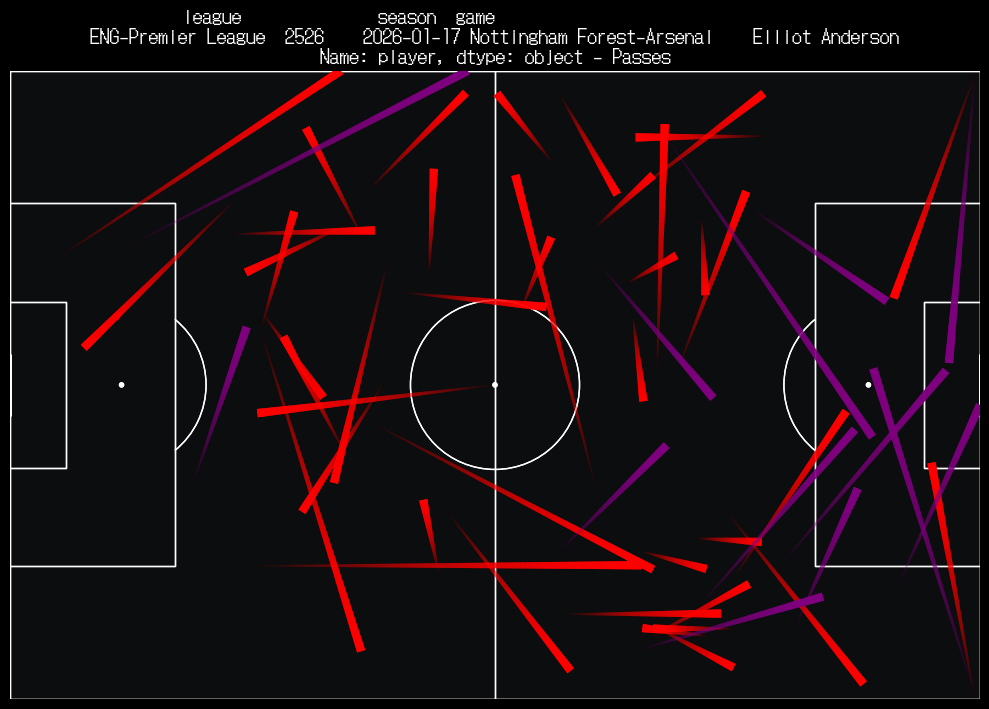

In [31]:
pitch = Pitch(pitch_type='opta',line_color = 'white', linewidth=1)
fig, ax = pitch.draw(figsize=(10,8))

pass_success = Pass[Pass['outcome_type'] == 'Successful']
pass_fail = Pass[Pass['outcome_type'] == 'Unsuccessful']

pass_plot(ax, pass_success, pass_fail,bg_color= '#0C0D0E')

In [33]:
splitter(game)

game_id  \
league             season game                                            
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
...                                                                 ...   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   
                          2026-01-17 Nottingham Forest-Arsenal  1903307   

                                                                pass_angle  \
league             season game                                               
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal -173.018943   
                          2026-01-17 Nottingham Forest-Arsenal  -18.663826   
                          2026-01-17 Nottingham Forest-Arsenal -176.820170   
                          2026-01-17 Nottingham Forest-Arsenal  121.607502   
                          2026-01-17 Nottingham Forest-Arsenal  -22.619865   
...                                                                    ...   
                          2026-01-17 Nottingham Forest-Arsenal   94.070756   
                          2026-01-17 Nottingham Forest-Arsenal  -73.433924   
                          2026-01-17 Nottingham Forest-Arsenal   97.923259   
                          2026-01-17 Nottingham Forest-Arsenal  -68.313550   
                          2026-01-17 Nottingham Forest-Arsenal  -35.612262   

                                                                pass_angle_abs  \
league             season game                                                   
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal      173.018943   
                          2026-01-17 Nottingham Forest-Arsenal       18.663826   
                          2026-01-17 Nottingham Forest-Arsenal      176.820170   
                          2026-01-17 Nottingham Forest-Arsenal      121.607502   
                          2026-01-17 Nottingham Forest-Arsenal       22.619865   
...                                                                        ...   
                          2026-01-17 Nottingham Forest-Arsenal       94.070756   
                          2026-01-17 Nottingham Forest-Arsenal       73.433924   
                          2026-01-17 Nottingham Forest-Arsenal       97.923259   
                          2026-01-17 Nottingham Forest-Arsenal       68.313550   
                          2026-01-17 Nottingham Forest-Arsenal       35.612262   

                                                                receiver  \
league             season game                                             
ENG-Premier League 2526   2026-01-17 Nottingham Forest-Arsenal  386969.0   
                          2026-01-17 Nottingham Forest-Arsenal  397497.0   
                          2026-01-17 Nottingham Forest-Arsenal  334653.0   
                          2026-01-17 Nottingham Forest-Arsenal  386969.0   
                          2026-01-17 Nottingham Forest-Arsenal  334653.0   
...                                                                  ...   
                          2026-01-17 Nottingham Forest-Arsenal  332325.0   
                          2026-01-17 Nottingham Forest-Arsenal  361822.0   
                          2026-01-17 Nottingham Forest-Arsenal  332325.0   
                          2026-01-17 Nottingham Forest-Arsenal  361822.0   
                          2026-01-17 Nottingham Forest-Arsenal       NaN   

                 